In [ ]:
API_KEY = "42879823-1b5468dacbdde4e98bb029a60"



In [ ]:
import requests
import pandas as pd

In [ ]:
def get_image(image_url, animal, num):
  img_data = requests.get(image_url).content
  image_path =f'animals/{animal}/{animal}_{num}.jpg'
  with open(image_path, 'wb') as handler:
    handler.write(img_data)
  return image_path

In [ ]:
import os, shutil
#shutil.rmtree('animals', ignore_errors=False, onerror=None)
try:
  os.mkdir('animals')
except:
  pass

animal_types = ['hippo', 'lion', 'giraffe', 'zebra', 'penguin', 'lemur', 'monkey']
ds = []
for animal_type in animal_types:
    try:
      os.mkdir(f'animals/{animal_type}')
    except:
      pass
    animals1 = requests.get(f"https://pixabay.com/api?key={API_KEY}&q={animal_type}&image_type=photo&per_page=100&page=1").json()['hits']
    animals2 = requests.get(f"https://pixabay.com/api?key={API_KEY}&q={animal_type}&image_type=photo&per_page=100&page=2").json()['hits']
    animals3 = requests.get(f"https://pixabay.com/api?key={API_KEY}&q={animal_type}&image_type=photo&per_page=100&page=3").json()['hits']


    for num, animal in enumerate(animals1 + animals2 + animals3):
      get_image(animal['webformatURL'], animal_type, num)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
batch_size = 32
img_height = 180
img_width = 180
data_dir = 'animals'

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=583,
  color_mode='rgb',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2100 files belonging to 7 classes.
Using 1680 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=583,
  color_mode='rgb',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2100 files belonging to 7 classes.
Using 420 files for validation.


In [ ]:
class_names = animal_types

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 7



model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(num_classes)
])
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_49 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_50 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_51 (Conv2D)          (None, 45, 45, 64)       

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [50]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
53/53 [==============================] - 74s 1s/step - loss: 1.8323 - accuracy: 0.2173 - val_loss: 1.7644 - val_accuracy: 0.2286
Epoch 2/15
53/53 [==============================] - 71s 1s/step - loss: 1.7289 - accuracy: 0.2536 - val_loss: 1.7242 - val_accuracy: 0.2405
Epoch 3/15
53/53 [==============================] - 69s 1s/step - loss: 1.6812 - accuracy: 0.2542 - val_loss: 1.7682 - val_accuracy: 0.2476
Epoch 4/15
53/53 [==============================] - 69s 1s/step - loss: 1.6454 - accuracy: 0.3018 - val_loss: 1.6002 - val_accuracy: 0.3500
Epoch 5/15
53/53 [==============================] - 68s 1s/step - loss: 1.6112 - accuracy: 0.3399 - val_loss: 1.5941 - val_accuracy: 0.3119
Epoch 6/15
53/53 [==============================] - 70s 1s/step - loss: 1.5382 - accuracy: 0.3821 - val_loss: 1.5042 - val_accuracy: 0.4357
Epoch 7/15
53/53 [==============================] - 71s 1s/step - loss: 1.4679 - accuracy: 0.4220 - val_loss: 1.4580 - val_accuracy: 0.4548
Epoch 8/15
53/53 [==

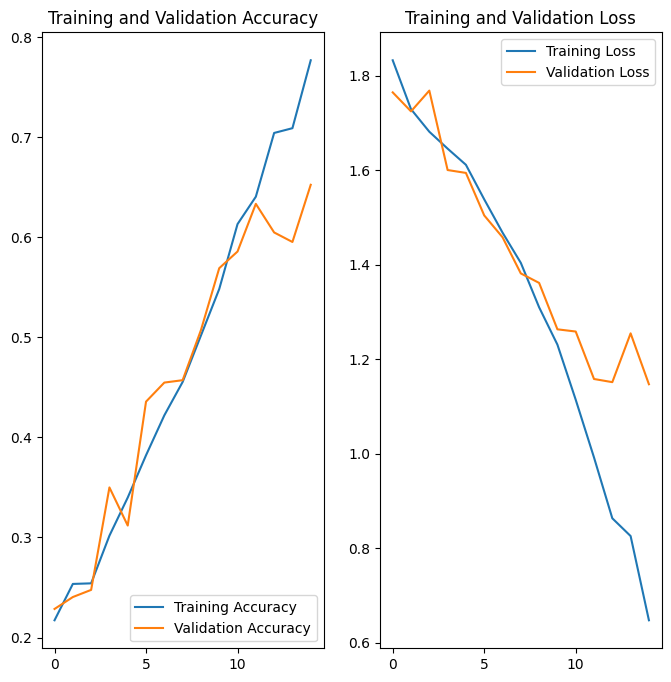

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()